In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Cardiotocographic -A5.csv")
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [2]:
#1.Data Cleaning and Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
# Count missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
df=df.fillna(df.select_dtypes(include="number").mean())
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [6]:
# outliers
import numpy as np

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

low=Q1-1.5*IQR
high=Q3+1.5*IQR

df_out=df.copy()

for col in df_out.columns:
    df_out[col]=np.where(df_out[col] < low[col], low[col], df_out[col])
    df_out[col]=np.where(df_out[col] > high[col], high[col], df_out[col])

df_out.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
#2. Statistical Summary

In [8]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [9]:
#mean
df.mean()

LB          133.343598
AC            0.003219
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000003
DP            0.000175
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64

In [10]:
#mode
df.mode().iloc[0]

LB          133.0
AC            0.0
FM            0.0
UC            0.0
DL            0.0
DS            0.0
DP            0.0
ASTV         65.0
MSTV          0.5
ALTV          0.0
MLTV          0.0
Width        39.0
Tendency      0.0
NSP           1.0
Name: 0, dtype: float64

In [11]:
#median
df.median()

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [12]:
#3.Data Visualization
 

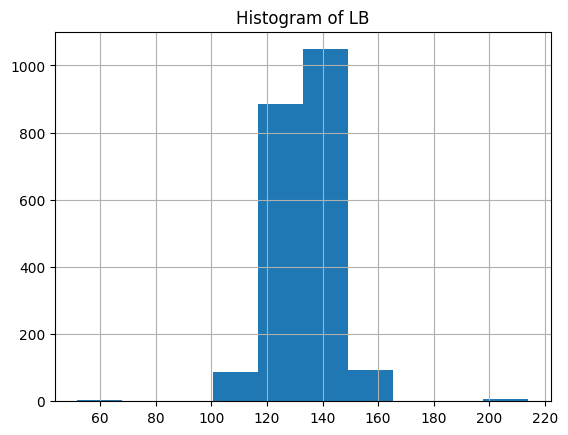

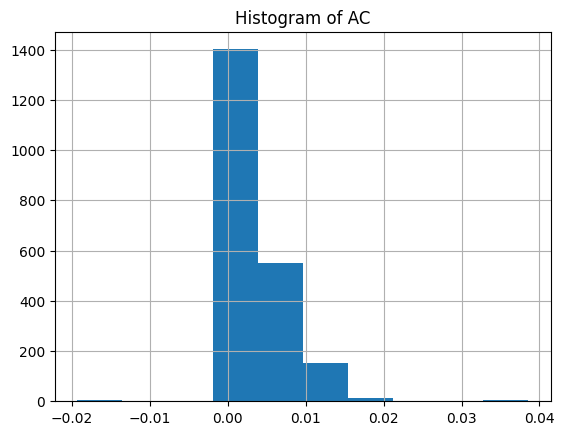

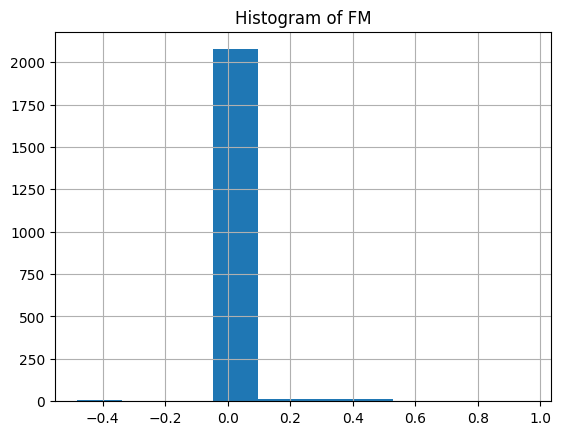

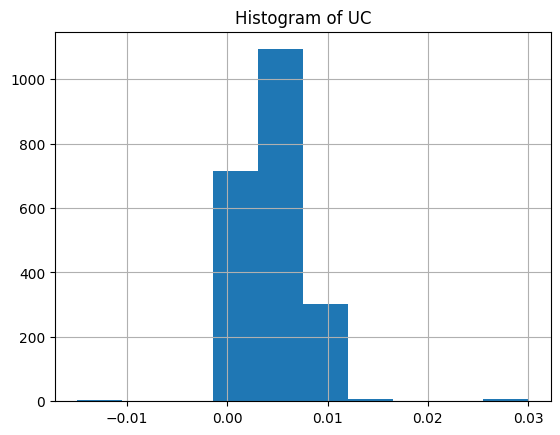

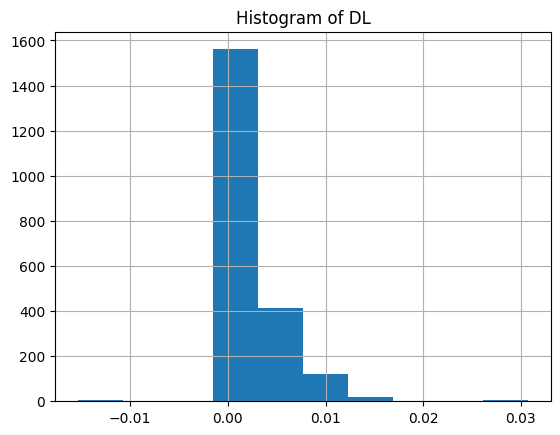

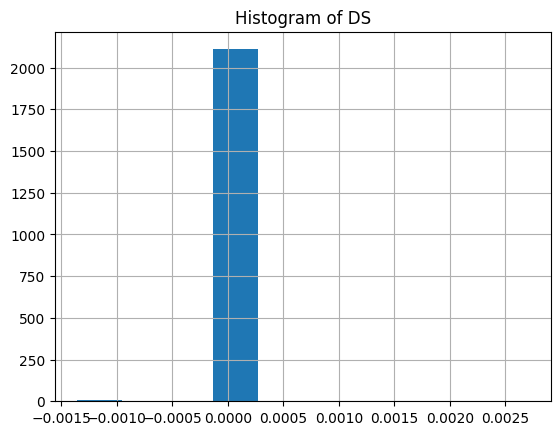

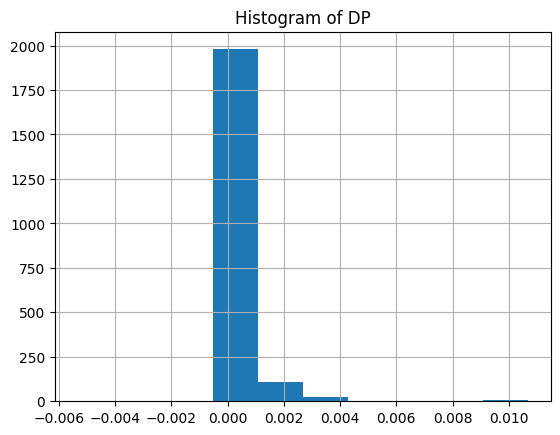

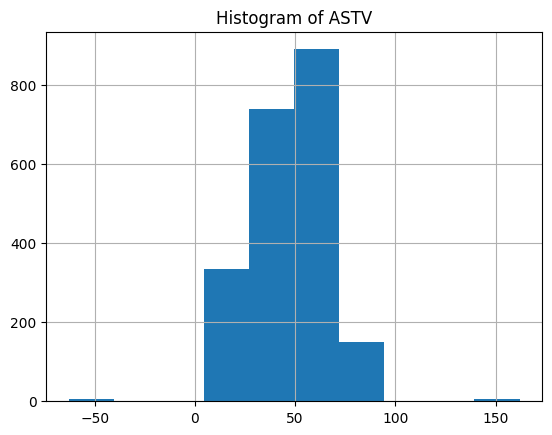

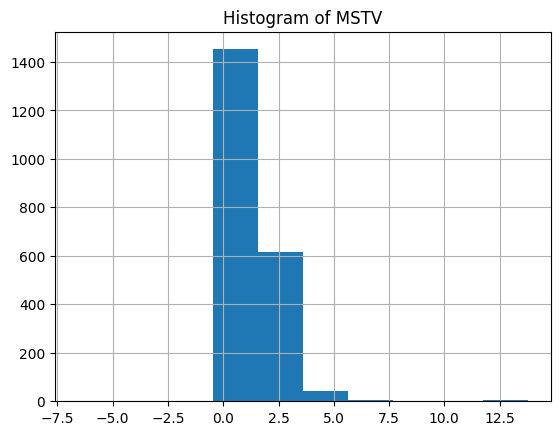

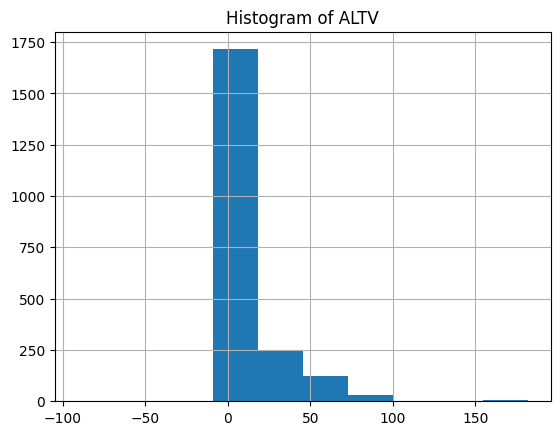

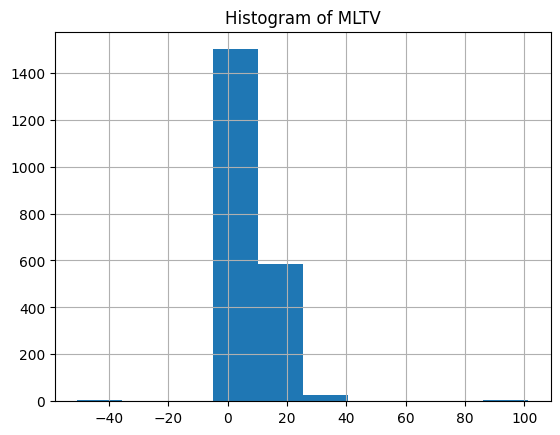

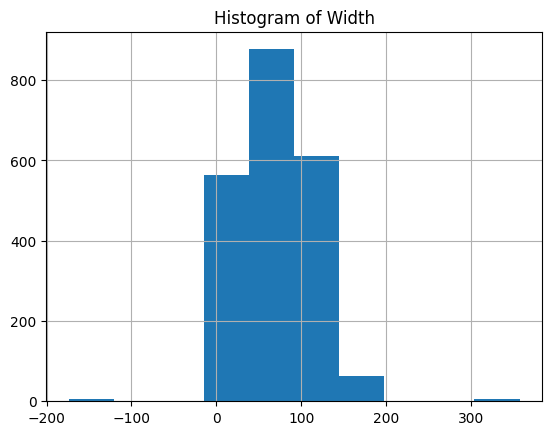

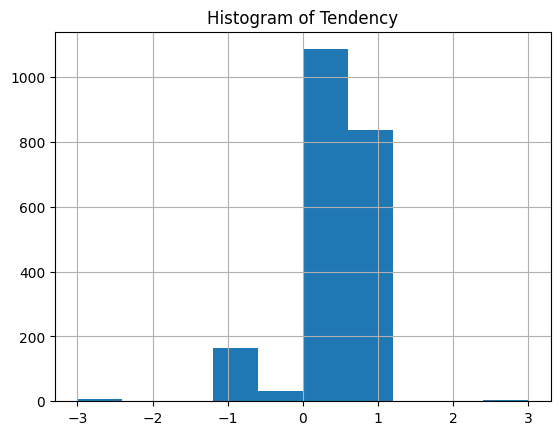

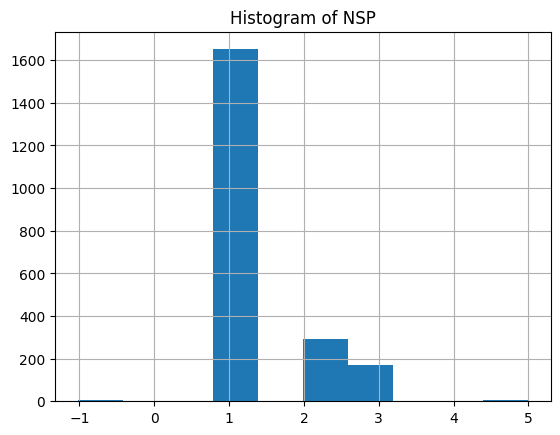

In [13]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.hist(df[col])
    plt.title(f"Histogram of {col}")
    plt.grid()
    plt.show()



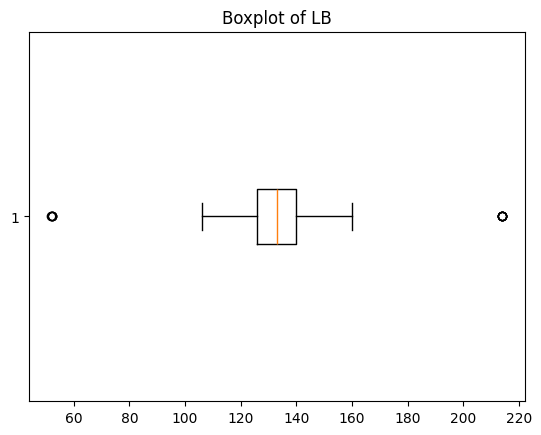

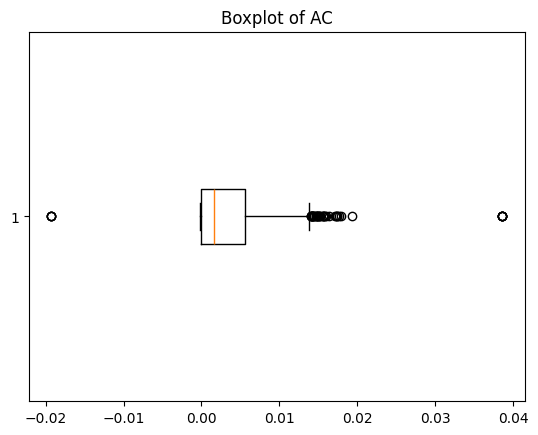

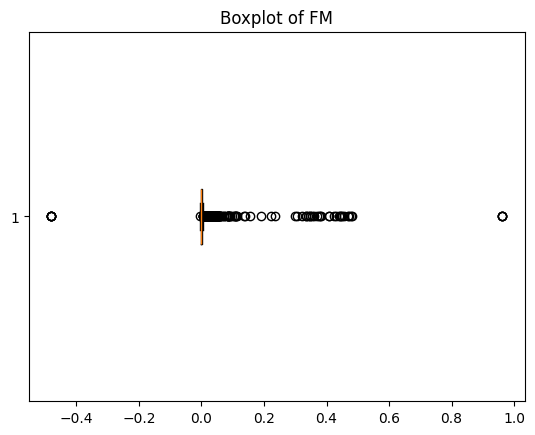

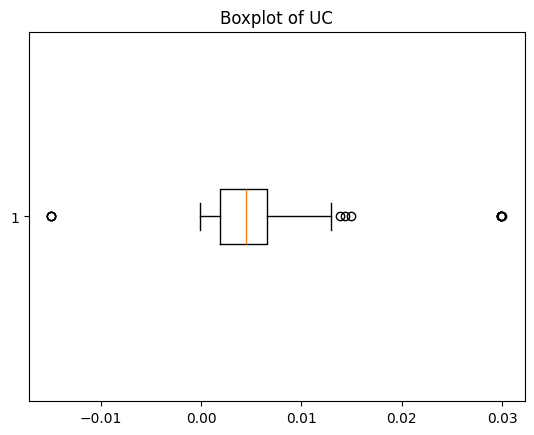

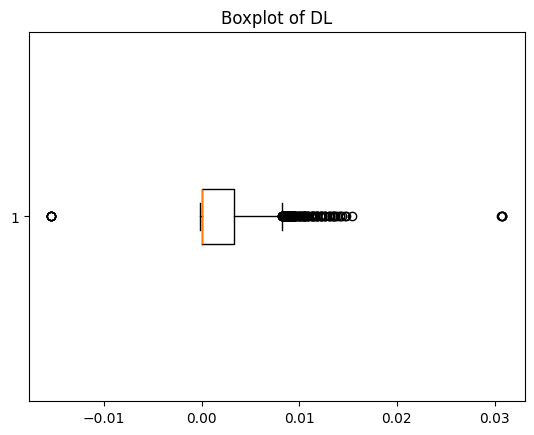

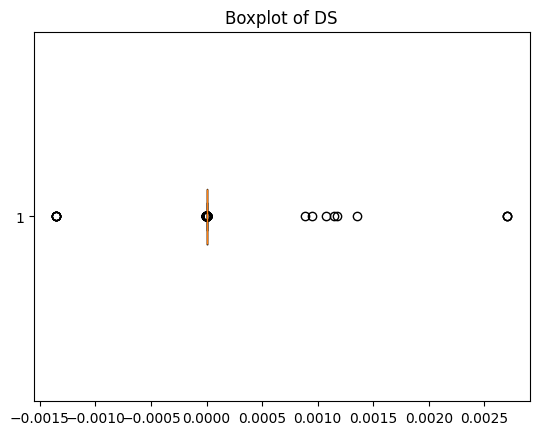

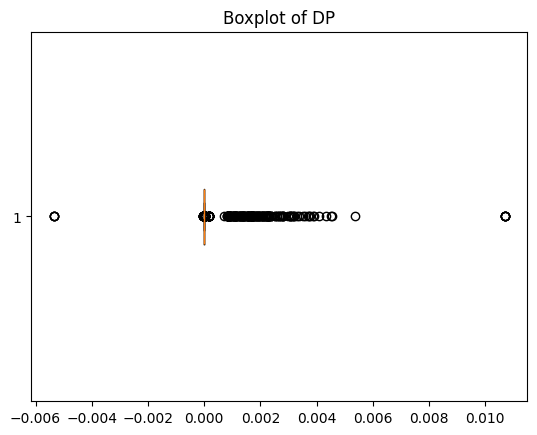

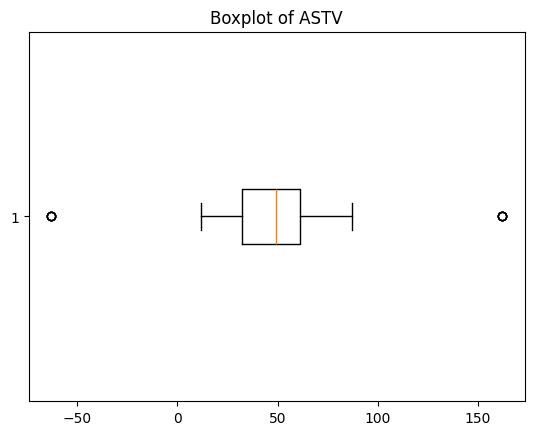

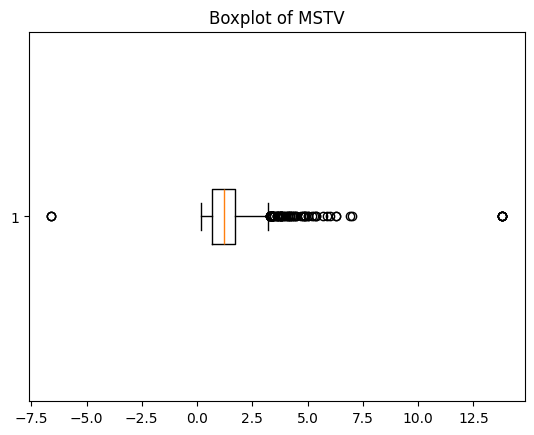

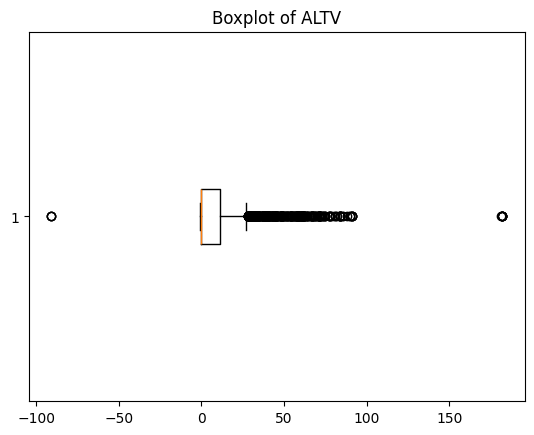

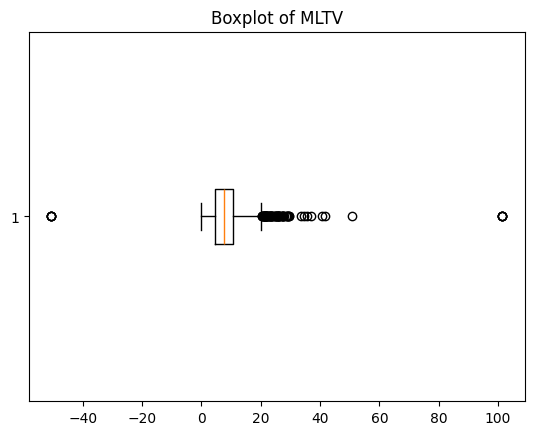

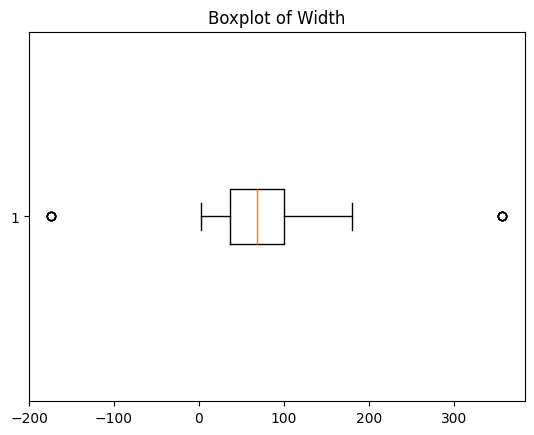

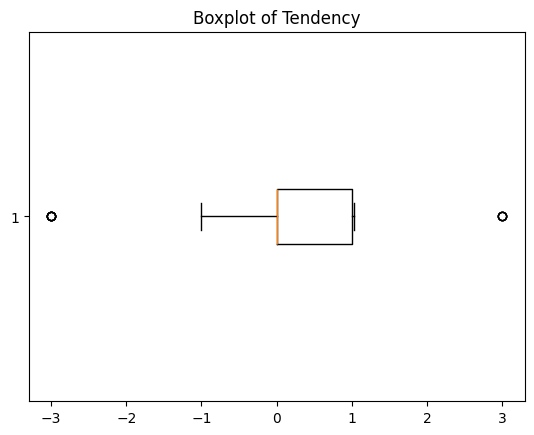

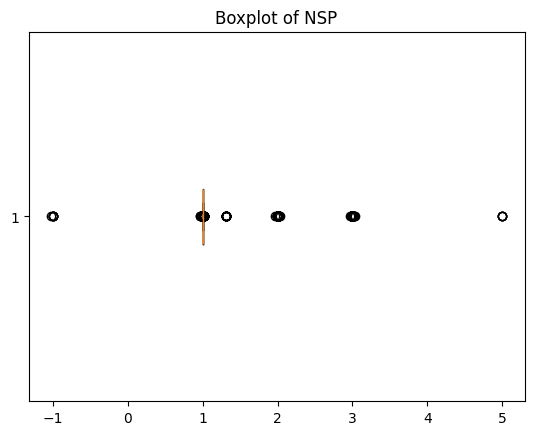

In [14]:
for col in df.columns:
    plt.boxplot(df[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [15]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357


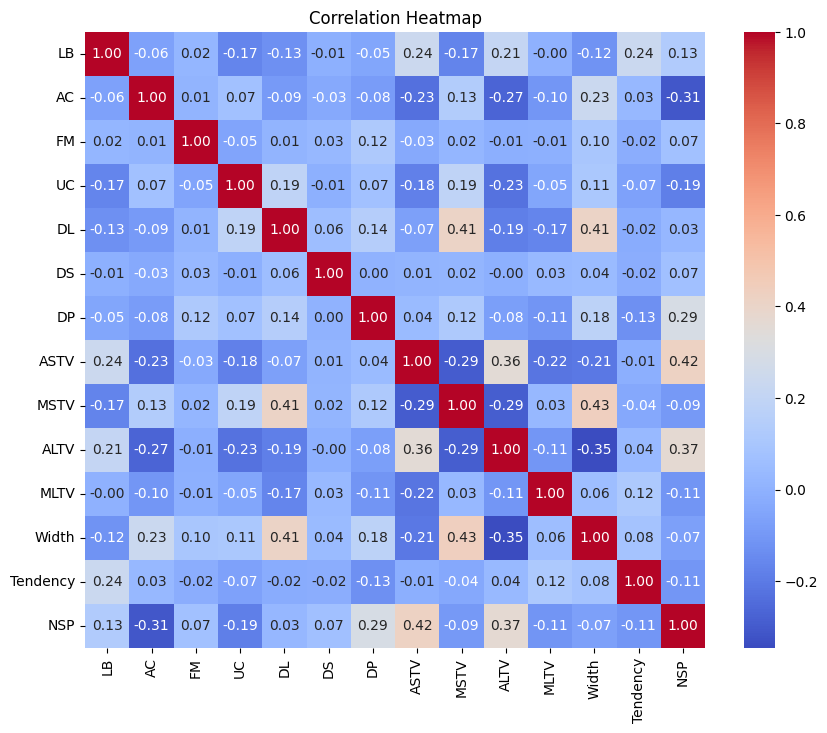

In [16]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#4. Pattern Recognition and Insights

In [18]:
correlations = df.corr()['LB'].sort_values(ascending=False)
print('Correlations with LB:\n', correlations)

Correlations with LB:
 LB          1.000000
ASTV        0.241857
Tendency    0.236864
ALTV        0.210446
NSP         0.131843
FM          0.018776
MLTV       -0.003457
DS         -0.005438
DP         -0.047724
AC         -0.062839
Width      -0.118425
DL         -0.126536
UC         -0.166201
MSTV       -0.169561
Name: LB, dtype: float64


In [19]:
for col in df.columns:
    rel=df.corr()[col].sort_values(ascending=False)
    print(f'Correlations with {col}:',rel )

Correlations with LB: LB          1.000000
ASTV        0.241857
Tendency    0.236864
ALTV        0.210446
NSP         0.131843
FM          0.018776
MLTV       -0.003457
DS         -0.005438
DP         -0.047724
AC         -0.062839
Width      -0.118425
DL         -0.126536
UC         -0.166201
MSTV       -0.169561
Name: LB, dtype: float64
Correlations with AC: AC          1.000000
Width       0.234735
MSTV        0.133649
UC          0.071863
Tendency    0.031977
FM          0.009432
DS         -0.033101
LB         -0.062839
DP         -0.083277
DL         -0.093196
MLTV       -0.104875
ASTV       -0.230439
ALTV       -0.271041
NSP        -0.312022
Name: AC, dtype: float64
Correlations with FM: FM          1.000000
DP          0.121274
Width       0.097204
NSP         0.074048
DS          0.029899
LB          0.018776
MSTV        0.017055
DL          0.009718
AC          0.009432
MLTV       -0.006237
ALTV       -0.011936
Tendency   -0.018338
ASTV       -0.032691
UC         -0.053226
Na